In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [131]:
path = '../data/seeds/seeds_dataset.txt'
columns = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv(path, sep='\s+', names=columns)

#  Data understanding

- Dataframe shape
- head and tail
- columns
- dtypes
- describe
- info

In [132]:
df.shape

(210, 8)

In [133]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [134]:
df.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry',
       'groove', 'class'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         210 non-null    float64
 1   perimeter    210 non-null    float64
 2   compactness  210 non-null    float64
 3   length       210 non-null    float64
 4   width        210 non-null    float64
 5   asymmetry    210 non-null    float64
 6   groove       210 non-null    float64
 7   class        210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [136]:
df.describe()

,area,perimeter,compactness,length,width,asymmetry,groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


# Data preparation
- dropping irrelevant columns and rows
- identifying duplicate columns
- renaming columns
- feature creation

In [137]:
df.isna().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
class          0
dtype: int64

In [138]:
df.isnull().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
class          0
dtype: int64

In [139]:
df.duplicated().sum()

0

# Feature Understanding

- Plotting histogram distributions
    - Histogram
    - Boxplot

In [140]:
df.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry',
       'groove', 'class'],
      dtype='object')

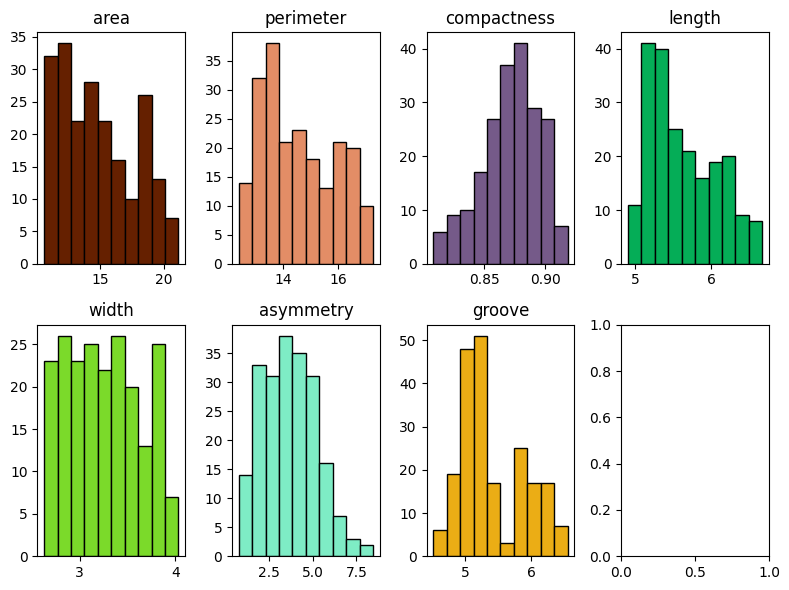

In [141]:
import random

def generate_random_rgb():
    r = lambda: random.randint(0,255)
    return (r() / 255, r() / 255, r() / 255)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 6))

i, j = 0, 0
for c in df.columns[:-1]:
    df[c].plot(ax=ax[i, j], kind='hist', title=c, color=generate_random_rgb(), edgecolor="black")
    ax[i, j].set_ylabel('')

    j += 1
    if j % 4 == 0:
        j = 0
        i += 1

plt.tight_layout()
plt.show()

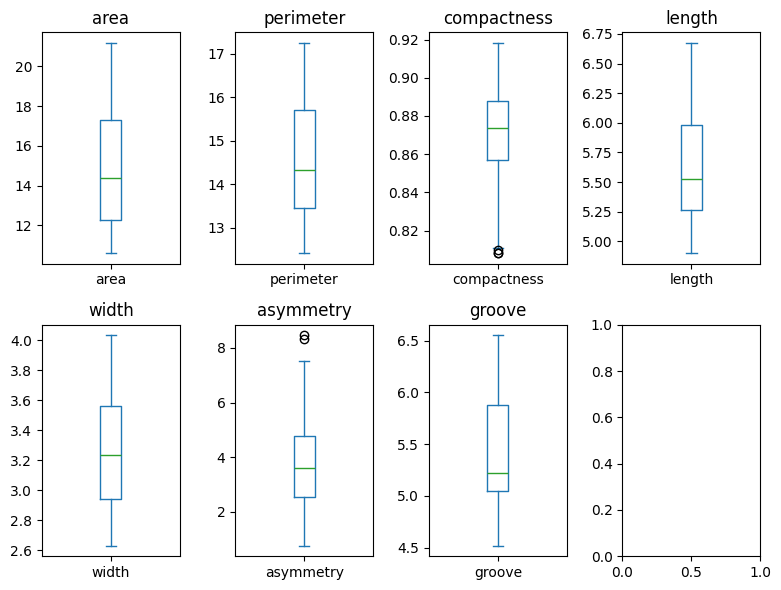

In [142]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 6))

i, j = 0, 0
for c in df.columns[:-1]:
    df[c].plot(ax=ax[i, j], kind='box', title=c)

    j += 1
    if j % 4 == 0:
        j = 0
        i += 1

plt.tight_layout()
plt.show()

# Feature Relationships

- Scatterplot
- Heatmap Correlation
- Pairplot

In [143]:
df.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry',
       'groove', 'class'],
      dtype='object')

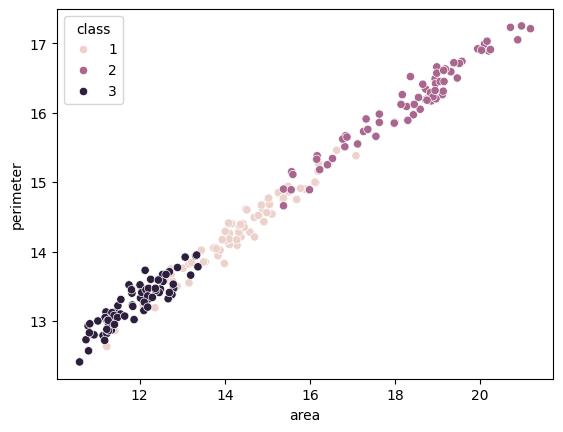

In [144]:
sns.scatterplot(data=df, x="area", y="perimeter", hue="class")
plt.show()

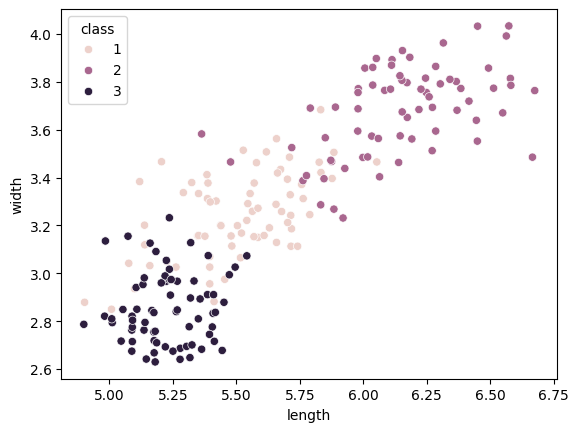

In [145]:
sns.scatterplot(data=df, x="length", y="width", hue="class")
plt.show()

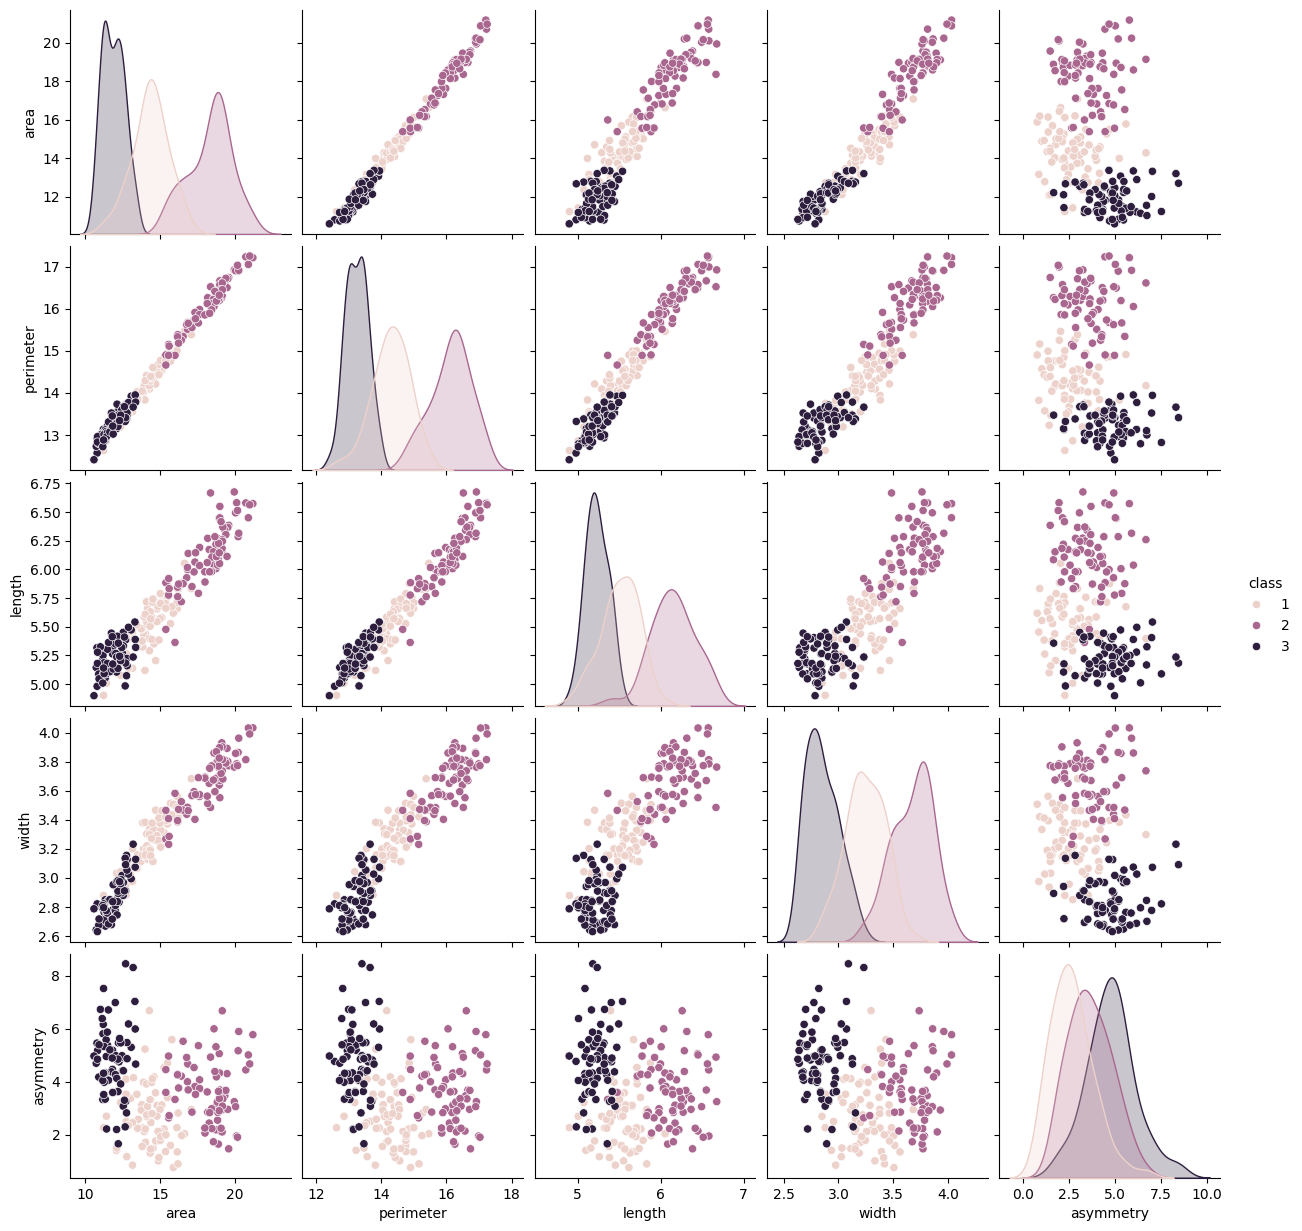

In [146]:
sns.pairplot(data=df, vars=['area', 'perimeter', 'length', 'width', "asymmetry"], hue='class')
plt.show()

In [147]:
df_corr = df[df.columns[:-1]].corr()
df_corr

,area,perimeter,compactness,length,width,asymmetry,groove
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
asymmetry,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


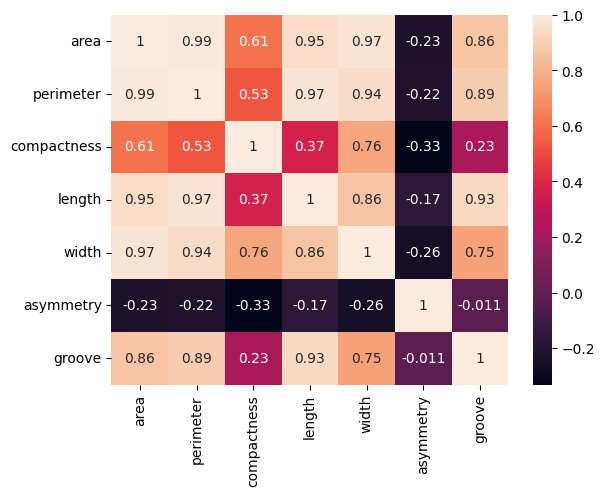

In [148]:
sns.heatmap(df_corr, annot=True)
plt.show()

# KMeans clustering

In [149]:
from sklearn.cluster import KMeans

x = "compactness"
y = "asymmetry"
X = df[[x, y]].values

In [150]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.labels_

In [151]:
clusters_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, 'class'])
clusters_df

,compactness,asymmetry,class
0,0.8710,2.221,1.0
1,0.8811,1.018,1.0
2,0.9050,2.699,1.0
3,0.8955,2.259,1.0
4,0.9034,1.355,1.0
...,...,...,...
205,0.8783,3.631,2.0
206,0.8511,4.325,2.0
207,0.8883,8.315,0.0
208,0.8521,3.598,2.0


# Classes predicted using KMeans

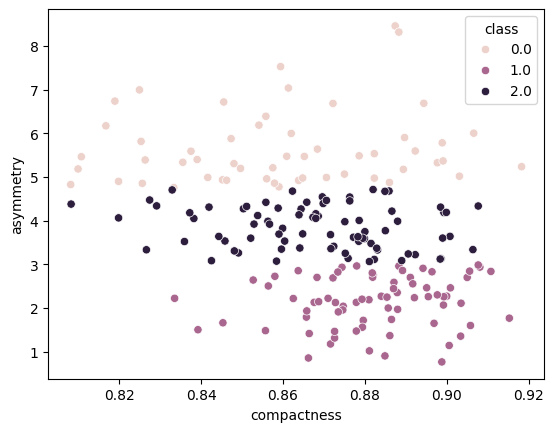

In [152]:
sns.scatterplot(data=clusters_df, x=x, y=y, hue='class')
plt.show()

# Original classes

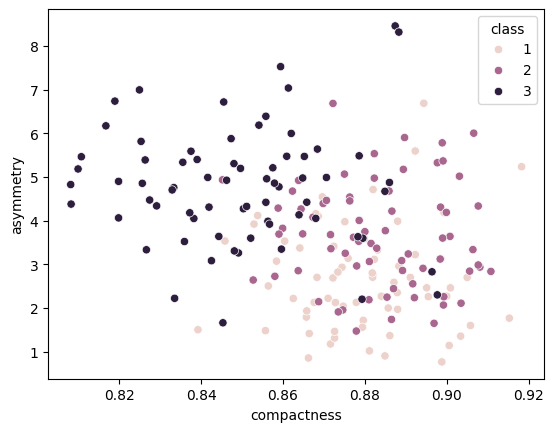

In [153]:
sns.scatterplot(data=df, x=x, y=y, hue='class')
plt.show()

# Using all features in KMeans class prediction

In [154]:
X = df[df.columns[:-1]].values
kmeans.fit(X)
clusters = kmeans.labels_
clusters_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=df.columns)

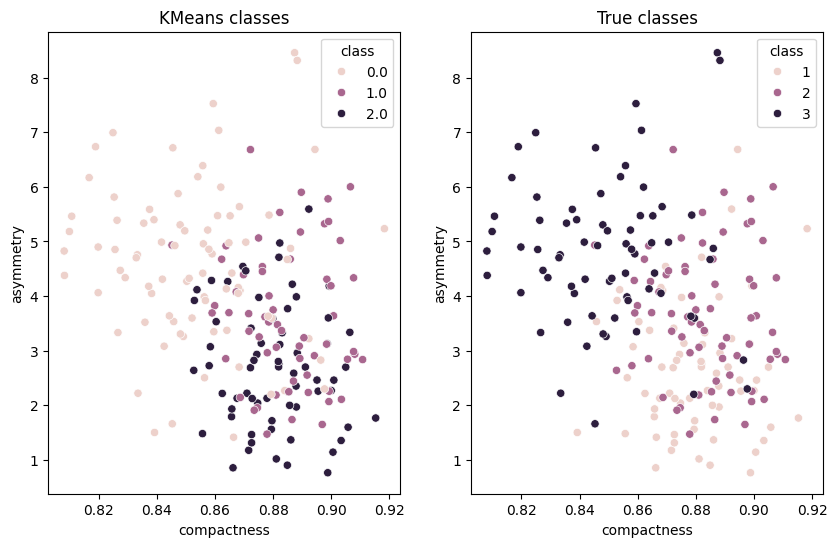

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.scatterplot(data=clusters_df, x=x, y=y, hue='class', ax=ax[0]).set(title="KMeans classes")
sns.scatterplot(data=df, x=x, y=y, hue='class', ax=ax[1]).set(title="True classes")
plt.show()

# KMeans + PCA

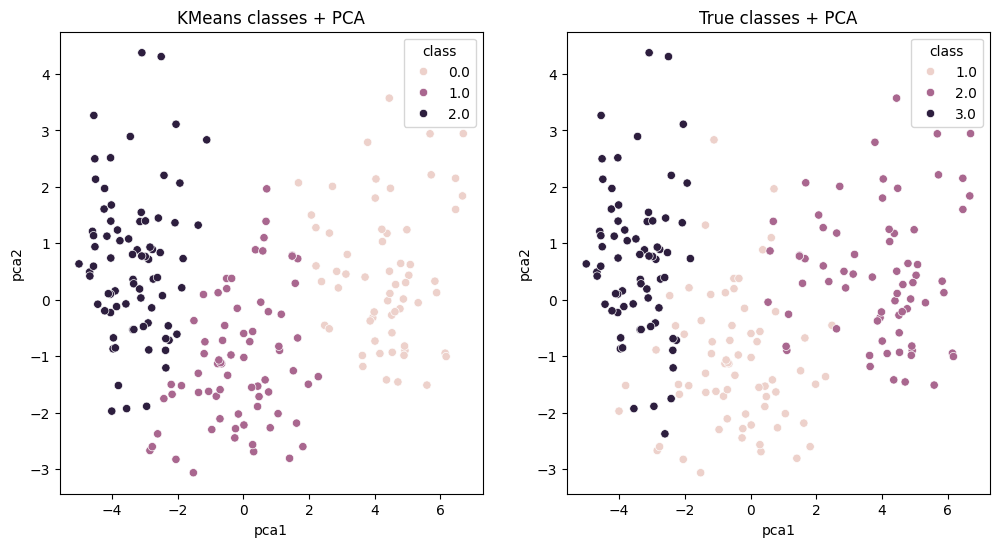

In [156]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3)
pca = PCA(n_components=2)

X = df[df.columns[:-1]]

kmeans.fit(X)
clusters = kmeans.labels_

X_pca = pca.fit_transform(X)

kmeans_pca_df = pd.DataFrame(np.hstack((X_pca, clusters.reshape(-1, 1))), columns=['pca1', 'pca2', 'class'])
original_pca_df = pd.DataFrame(np.hstack((X_pca, df['class'].values.reshape(-1, 1))), columns=['pca1', 'pca2', 'class'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.scatterplot(data=kmeans_pca_df, x='pca1', y='pca2', hue='class', ax=ax[0]).set(title="KMeans classes + PCA")
sns.scatterplot(data=original_pca_df, x='pca1', y='pca2', hue='class', ax=ax[1]).set(title="True classes + PCA")
plt.show()